# 프로젝트 : 얼굴을 인식하여 캐릭터 씌우기

## Face Detection vs Face Recognition

> pip install mediapipe

In [58]:
import cv2
import mediapipe as mp

def overlay(image, x, y, w, h, overlay_image): # 대상 이미지(3채널), x, y 좌표, width, height, 덮어씌울 이미지 (4채널)
    alpha = overlay_image[:, :, 3] # BGRA Alpha 값만 가져옴
    mask_image = alpha / 255 # 0 ~ 255 -> 0 ~ 1 사이의 값 (1:불투명, 0:완전투명)
    
    for c in range(0, 3): # channel | BRG
        image[y-h:y+h, x-w:x+w, c] = (overlay_image[:, :, c] * mask_image) + (image[y-h:y+h, x-w:x+w, c] * (1 - mask_image))
    
    
# 얼굴을 찾고, 찾은 얼굴에 표시를 해주기 위한 변수 정의
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 face_detection 모듈을 사용
mp_drawing = mp.solutions.drawing_utils

# 동영상 파일 열기
cap = cv2.VideoCapture('face_video.mp4')

# 이미지 불러오기
image_right_eye = cv2.imread('fox_right_eye.png', cv2.IMREAD_UNCHANGED) # 100*100
image_left_eye = cv2.imread('fox_left_eye.png', cv2.IMREAD_UNCHANGED) # 100*100
image_nose = cv2.imread('fox_nose_tip.png', cv2.IMREAD_UNCHANGED)# 100*300

with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.7) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.detections:
            # 6개 특징 : 오른쪽 눈, 왼쪽 눈, 코 끝부분, 입 중심, 오른쪽 귀, 왼쪽 귀 (귀구슬점)
            for detection in results.detections: 
                # mp_drawing.draw_detection(image, detection)
                # print(detection)
                
                # 특정 위치 가져오기
                keypoints = detection.location_data.relative_keypoints
                right_eye = keypoints[0] # 오른쪽 눈
                left_eye = keypoints[1] # 왼쪽 눈
                nose_tip = keypoints[2]
                
                h, w, _ = image.shape # height, width, channel : 이미지로부터 세로, 가로 크기 가져옴
                right_eye = (int(right_eye.x * w) - 20, int(right_eye.y * h) - 100) # 이미지 내에서 실제 좌표 (x, y)
                left_eye = (int(left_eye.x * w)+ 20, int(left_eye.y * h) - 100)
                nose_tip = (int(nose_tip.x * w), int(nose_tip.y * h))
                
                # 양 눈에 동그라미 그리기
                # cv2.circle(image, right_eye, 50, (255, 0, 0), 10, cv2.LINE_AA)
                # cv2.circle(image, left_eye, 50, (0, 255, 0), 10, cv2.LINE_AA)
                # 코에 동그라미 그리기
                # cv2.circle(image, nose_tip, 75, (0, 255, 255), 10, cv2.LINE_AA)
                
                # 각 특징에다가 이미지 그리기
                #image[right_eye[1] - 50:right_eye[1] + 50, right_eye[0] - 50:right_eye[0] + 50] = image_right_eye
                #image[left_eye[1] - 50:left_eye[1] + 50, left_eye[0] - 50:left_eye[0] + 50] = image_left_eye
                #image[nose_tip[1] - 50:nose_tip[1] + 50, nose_tip[0]-150:nose_tip[0]+150] = image_nose
                
                # image x, y, w, h, overlay_image
                overlay(image, *right_eye, 50, 50, image_right_eye)
                overlay(image, *left_eye, 50, 50, image_left_eye)
                overlay(image, *nose_tip, 150, 50, image_nose)
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.resize(image, None, fx=0.5, fy=0.5))
        
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [48]:
image_right_eye = cv2.imread('fox_right_eye.png', cv2.IMREAD_UNCHANGED)
image_right_eye.shape

(100, 100, 4)

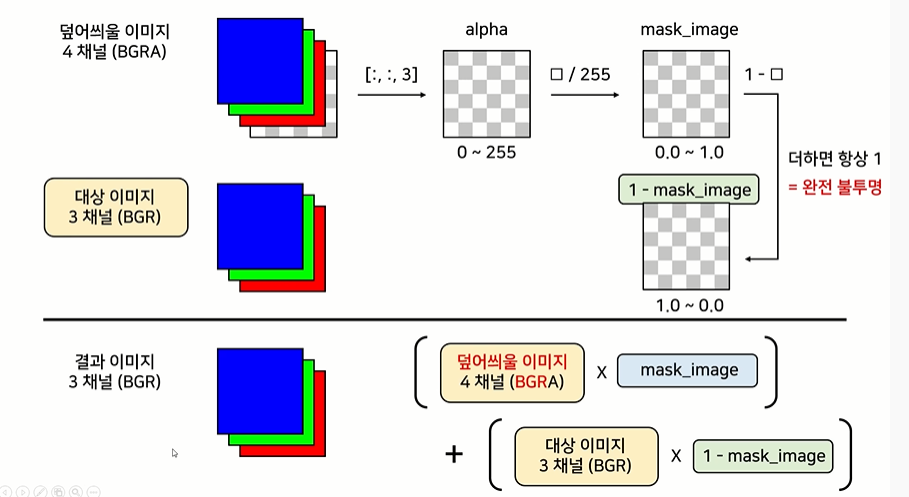
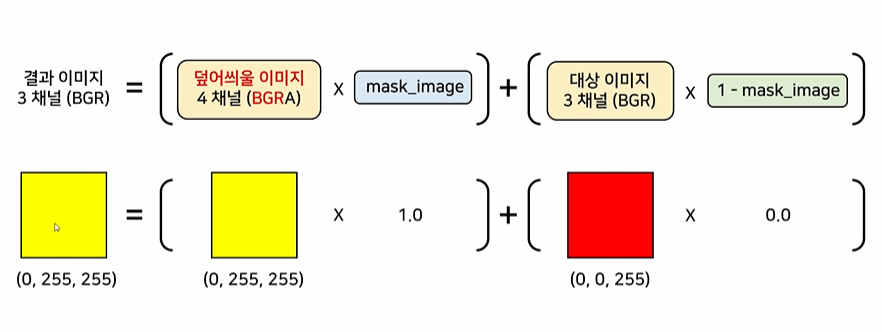

## 학습 참고 자료

> python opencv readthedocs